In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

In [2]:
w = scipy.misc.imread("data/HendrixCollegeMainEntrance.PNG")

In [3]:
w

array([[[255, 255, 151],
        [255, 255, 158],
        [212, 219, 123],
        ..., 
        [ 53,  88,  45],
        [ 82, 119,  78],
        [123, 161, 124]],

       [[253, 255, 165],
        [224, 227, 140],
        [176, 181, 101],
        ..., 
        [147, 180, 135],
        [137, 172, 130],
        [121, 157, 119]],

       [[108, 108,  46],
        [ 67,  67,   7],
        [ 46,  49,   0],
        ..., 
        [193, 221, 172],
        [165, 197, 150],
        [128, 159, 117]],

       ..., 
       [[ 51,  53,   6],
        [ 62,  61,  15],
        [ 65,  64,  16],
        ..., 
        [ 96,  71,  51],
        [105,  79,  62],
        [126,  99,  82]],

       [[ 51,  53,   4],
        [ 62,  61,  13],
        [ 66,  66,  14],
        ..., 
        [144, 114,  88],
        [149, 114,  92],
        [151, 115,  93]],

       [[ 51,  53,   3],
        [ 62,  62,  12],
        [ 66,  66,  14],
        ..., 
        [216, 182, 155],
        [198, 161, 135],
        [165, 125,

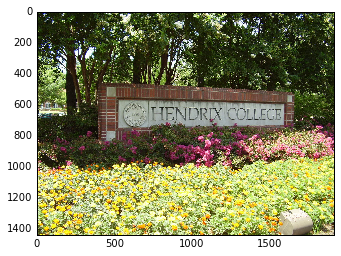

In [40]:
plt.imshow(w)

In [5]:
z = w.reshape((-1, 3))

In [6]:
z

array([[255, 255, 151],
       [255, 255, 158],
       [212, 219, 123],
       ..., 
       [216, 182, 155],
       [198, 161, 135],
       [165, 125, 100]], dtype=uint8)

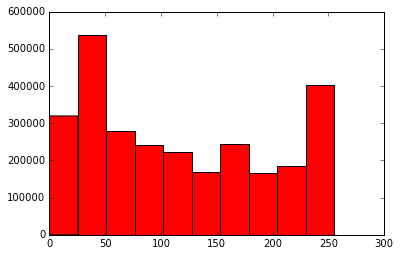

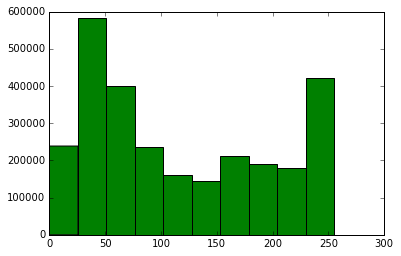

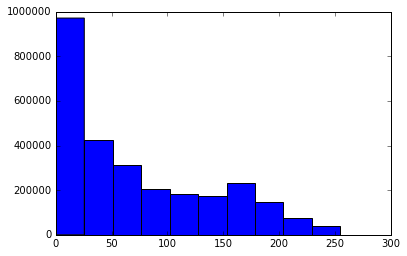

In [8]:
colors = ["r", "g", "b"]
for i in range(3):
    plt.figure(i)
    plt.hist(z[:, i], color=colors[i])


In [30]:
from scipy.cluster.vq import kmeans, vq
z = z.astype(float)
centroids, _ = kmeans(z, 8)

In [31]:
centroids

array([[ 173.02872536,  173.14066964,  154.39516399],
       [ 148.69809486,  153.60673135,   78.60176222],
       [  61.83545721,   62.97396247,   28.98631587],
       [ 240.64561936,  221.01780398,   50.67024462],
       [  27.19505057,   31.44396062,    9.50482082],
       [ 105.3441205 ,   90.50092184,   59.48488202],
       [ 219.24129734,  229.98727585,  137.31436122],
       [ 241.65887892,  244.51508744,  202.07243829]])

In [32]:
len(z)

2764800

In [33]:
ind, _ = vq(z, centroids)

In [34]:
res = centroids[ind]

In [35]:
res

array([[ 219.24129734,  229.98727585,  137.31436122],
       [ 241.65887892,  244.51508744,  202.07243829],
       [ 219.24129734,  229.98727585,  137.31436122],
       ..., 
       [ 173.02872536,  173.14066964,  154.39516399],
       [ 173.02872536,  173.14066964,  154.39516399],
       [ 148.69809486,  153.60673135,   78.60176222]])

In [46]:
res2 = res.reshape((w.shape)).astype("uint8")

In [47]:
res2

array([[[219, 229, 137],
        [241, 244, 202],
        [219, 229, 137],
        ..., 
        [ 61,  62,  28],
        [105,  90,  59],
        [148, 153,  78]],

       [[241, 244, 202],
        [219, 229, 137],
        [148, 153,  78],
        ..., 
        [173, 173, 154],
        [173, 173, 154],
        [148, 153,  78]],

       [[105,  90,  59],
        [ 61,  62,  28],
        [ 27,  31,   9],
        ..., 
        [219, 229, 137],
        [173, 173, 154],
        [148, 153,  78]],

       ..., 
       [[ 61,  62,  28],
        [ 61,  62,  28],
        [ 61,  62,  28],
        ..., 
        [105,  90,  59],
        [105,  90,  59],
        [105,  90,  59]],

       [[ 61,  62,  28],
        [ 61,  62,  28],
        [ 61,  62,  28],
        ..., 
        [148, 153,  78],
        [148, 153,  78],
        [148, 153,  78]],

       [[ 61,  62,  28],
        [ 61,  62,  28],
        [ 61,  62,  28],
        ..., 
        [173, 173, 154],
        [173, 173, 154],
        [148, 153,

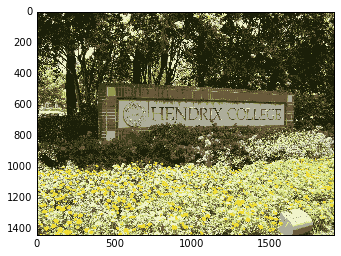

In [48]:
plt.imshow(res2)

In [39]:
scipy.misc.imsave("data/compressed2.png", res2)